In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
from imblearn.combine import SMOTEENN

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')
%cd 'drive/Shareddrives/CSCI 461/processed'
#%ls processed/*


Mounted at /content/drive/
/content/drive/Shareddrives/CSCI 461/processed


# DATA MANIPULATION

In [ ]:
# Importing the data

data = pd.read_csv("combined_ohe_17.csv")
#data.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
#print(data.head())

In [ ]:
edu_matrix = data[["highedcert_associate degree","highedcert_bachelor degree","highedcert_high school or ged",
                  "highedcert_higher degree","highedcert_none of the above","highedcert_vocational certificate",
                  "highedcert_vocational license"]]
data["edu_categorical"] = edu_matrix.idxmax(axis=1)

In [ ]:
# making education binary

educationBinary = \
{   
    "highedcert_associate degree": 1,
    "highedcert_bachelor degree": 1,
    "highedcert_high school or ged": 1,
    "highedcert_higher degree": 1,
    "highedcert_none of the above":0,
    "highedcert_vocational certificate": 1,
    "highedcert_vocational license": 1
}
data['edu_binary'] = data["edu_categorical"].map(educationBinary) 

In [ ]:
# dropping overlap variables (and other outcome features, recnumbr)
# data.drop(columns=["recnumbr", "highedcert_associate degree","highedcert_bachelor degree","highedcert_high school or ged",
#                   "highedcert_higher degree","highedcert_none of the above","highedcert_vocational certificate",
#                   "highedcert_vocational license","edu_categorical", 'homeless_no','homeless_yes','subabuse_no',
#                    'subabuse_yes', 'incarc_no', 'incarc_yes', 'edu_categorical'], axis=1, inplace=True)
#subabuse
data.drop(columns=["recnumbr", "highedcert_associate degree","highedcert_bachelor degree","highedcert_high school or ged",
                  "highedcert_higher degree","highedcert_none of the above","highedcert_vocational certificate",
                  "highedcert_vocational license","edu_categorical", 'currpte_yes', 'currpte_no','currfte_yes', 
                   'currfte_no', 'edu_binary','homeless_no','homeless_yes', 'subabuse_no', 'incarc_no', 'incarc_yes', 'edu_categorical'], axis=1, inplace=True)
#data.nunique()

In [ ]:
# drop services (OPTIONAL)
# data.drop(columns=['specedsv_No',
#  'specedsv_Yes',
#  'ilnasv_No',
#  'ilnasv_Yes',
#  'acsuppsv_No',
#  'acsuppsv_Yes',
#  'psedsuppsv_No',
#  'psedsuppsv_Yes',
#  'careersv_No',
#  'careersv_Yes',
#  'emplytrsv_No',
#  'emplytrsv_Yes',
#  'budgetsv_No',
#  'budgetsv_Yes',
#  'housedsv_No',
#  'housedsv_Yes',
#  'hlthedsv_No',
#  'hlthedsv_Yes',
#  'famsuppsv_No',
#  'famsuppsv_Yes',
#  'mentorsv_No',
#  'mentorsv_Yes',
#  'silsv_No',
#  'silsv_Yes',
#  'rmbrdfasv_No',
#  'rmbrdfasv_Yes',
#  'educfinasv_No',
#  'educfinasv_Yes',
#  'othrfinasv_No',
#  'othrfinasv_Yes'], axis=1, inplace=True)

In [ ]:
# filtering for age 19+ and balancing the class
#data = data[data['age']>18].sort_values('age', ascending = False).sort_values('edu_binary').iloc[:1084*2,:]

target='subabuse_yes'

#subabuse
#data = data[data['age']>18].sort_values('age', ascending = False).sort_values(target)

#filter 17

# data = data[data['age']==17]
data.drop(columns=["age"], inplace=True)

## SETTING UP MODELS

In [ ]:
k=5
y = data.loc[:,target]
X = data.loc[:,data.columns != target]
X=X.reset_index(drop=True)
smote_enn = SMOTEENN(random_state=0)
X, y = smote_enn.fit_resample(X, y)

In [ ]:
1/(data.subabuse_yes.value_counts()[1] / data.subabuse_yes.value_counts()[0])

3.2108976144063863

In [ ]:
y.value_counts()[1] / y.value_counts()[0]

1.619936621658859

In [ ]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)
#data['target'] IS THE VARIABLE USED FOR STRATIFIED SAMPLING.
splits = kfold.split(X,y)
print(f'PROPORTION OF TARGET IN THE ORIGINAL DATA\n{y.value_counts() / len(y)}\n\n')
for n,(train_index,test_index) in enumerate(splits):
    print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
          f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nPROPORTION OF TARGET IN THE TRAINING SET\n'+
          f'{y[test_index].value_counts() / len(y[test_index])}\nPROPORTION OF TARGET IN THE TEST SET\n'+
          f'{y[train_index].value_counts() / len(y[train_index])}\n\n')


PROPORTION OF TARGET IN THE ORIGINAL DATA
1    0.618311
0    0.381689
Name: subabuse_yes, dtype: float64


SPLIT NO 1
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.618246
0    0.381754
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.618328
0    0.381672
Name: subabuse_yes, dtype: float64


SPLIT NO 2
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.618328
0    0.381672
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.618307
0    0.381693
Name: subabuse_yes, dtype: float64


SPLIT NO 3
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.618328
0    0.381672
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.618307
0    0.381693
Name: subabuse_yes, dtype: float64


SPLIT NO 4
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.618328
0    0.3

In [ ]:
# Functions to print CM heat map and performnce results

from sklearn.metrics import confusion_matrix
#from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
#import sklearn
import seaborn as sns

def my_cm(y,y_pred):
  # done backwards for labeling
  cm = confusion_matrix(y,y_pred)
  # print(cm)
  print(cm.ravel())
  print('(tn, fp, fn, tp)')
  cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
  cm_matrix = cm_matrix.loc[ ['Actual Positive:1','Actual Negative:0'], [ 'Predict Positive:1', 'Predict Negative:0']]
  #cm_matrix = cm_matrix.transpose()
  return sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
def my_cm_dec(y,y_pred):
  cm = confusion_matrix(y,y_pred)
  # print(cm.ravel())
  # print('(tn, fp, fn, tp)')
  n=sum(cm.ravel()[:2])
  p=sum(cm.ravel()[2:])
  cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
  cm_matrix = cm_matrix.loc[ ['Actual Positive:1','Actual Negative:0'], [ 'Predict Positive:1', 'Predict Negative:0']]
  cm_matrix.loc['Actual Positive:1', :] = cm_matrix.loc['Actual Positive:1', :] /p
  cm_matrix.loc['Actual Negative:0', :]  = cm_matrix.loc['Actual Negative:0', :] /n
  sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu')
  plt.show()
  return cm.ravel()
  

def my_scores(mod, X, y,k=5):
  scoring = ['accuracy', 'precision', 'f1', 'recall', 'roc_auc']
  scores = cross_validate(mod, X, y, cv=k,scoring=scoring)
  print("accuracy:",sum(scores["test_accuracy"])/k)
  print("precision:",sum(scores["test_precision"])/k)
  print("auc:",sum(scores["test_roc_auc"])/k)
  print("recall:",sum(scores["test_recall"])/k)
  print("f1:",sum(scores["test_f1"])/k)
  return 
def stdev(test_list):
  mean = sum(test_list) / len(test_list)
  return (sum([((x - mean) ** 2) for x in test_list]) / len(test_list)) ** 0.5

In [ ]:
state=X[["st_AK","st_AL","st_AR","st_AZ","st_CA","st_CO",
"st_CT","st_DC","st_DE","st_FL",
"st_GA","st_HI","st_IA","st_ID","st_IL","st_IN","st_KS","st_KY","st_LA","st_MA",
"st_MD","st_ME","st_MI","st_MN","st_MO","st_MS","st_MT","st_NC","st_ND","st_NE","st_NH",
"st_NJ","st_NM","st_NV","st_NY","st_OH","st_OK","st_OR","st_PA","st_PR","st_RI","st_SC","st_SD",
"st_TN","st_TX","st_UT","st_VA","st_VT","st_WA","st_WI","st_WV","st_WY"]].idxmax(axis=1)

mapping={"st_AK":"West",
"st_AZ":"West","st_CA":"West","st_CO":"West","st_HI":"West","st_ID":"West","st_MT":"West","st_NM":"West","st_NV":"West",
"st_OR":"West","st_UT":"West","st_WA":"West","st_WY":"West","st_AL":"South","st_AR":"South",
"st_DC":"South","st_DE":"South","st_FL":"South","st_GA":"South","st_KY":"South","st_LA":"South",
"st_MD":"South","st_MS":"South","st_NC":"South","st_OK":"South","st_PR":"South","st_SC":"South",
"st_TN":"South","st_TX":"South","st_VA":"South","st_WV":"South","st_CT":"Northeast","st_ME":"Northeast",
"st_MA":"Northeast","st_NH":"Northeast","st_NJ":"Northeast","st_NY":"Northeast","st_PA":"Northeast","st_RI":"Northeast","st_VT":"Northeast","st_IA":"Midwest","st_IL":"Midwest","st_IN":"Midwest","st_KS":"Midwest",
"st_MI":"Midwest","st_MN":"Midwest","st_MO":"Midwest","st_ND":"Midwest","st_NE":"Midwest","st_OH":"Midwest","st_SD":"Midwest",
"st_WI":"Midwest"
}
region =state.map(mapping)

## SVM

TIME: 0.7098339378833335 min


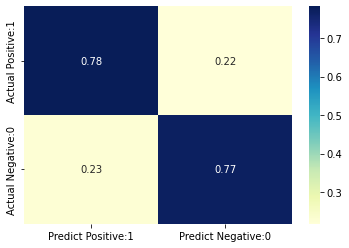

In [ ]:
# import SVC classifier
from sklearn.svm import LinearSVC

# instantiate classifier with default hyperparameters
svc=LinearSVC(max_iter=1800) 

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(svc, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
my_cm_dec(y, y_pred)
plt.show()


In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(svc,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.7782950789094604
precision: 0.8195985141527755
auc: 0.8720826937266644
recall: 0.7818839038911333
f1: 0.7751853189112827
TIME: 0.6906186289666664 min


## Random Forest Classifier

TIME: 0.571651713 min


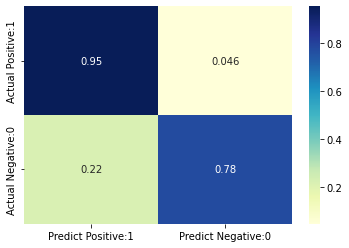

array([11320,  3196,  1083, 22432])

In [ ]:
# import RF classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate classifier with default hyperparameters
rfc=RandomForestClassifier() 

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(rfc, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
# my_cm(y, y_pred)
# plt.show()
my_cm_dec(y, y_pred)


In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(rfc,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.8873839542104903
precision: 0.8738302815701442
auc: 0.9627888792726141
recall: 0.9545396555390177
f1: 0.9116428355290443
TIME: 0.5108496864499993 min


## XGBoost Classifier

TIME: 0.7205905728666664 min


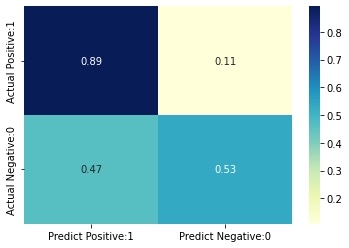

array([ 7762,  6754,  2552, 20963])

In [ ]:
#XGBoost Classifier
from xgboost import XGBClassifier

# instantiate classifier with default hyperparameters
model=XGBClassifier()

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(model, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
my_cm_dec(y, y_pred)


In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(model,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.7553084003997178
precision: 0.7540338431892708
auc: 0.8447833936672074
recall: 0.8914735275356156
f1: 0.8151141425794084
TIME: 0.7535689725833322 min


## Logistic Regression

TIME: 0.1268712935499991 min
[  270 14246    45 23470]
(tn, fp, fn, tp)


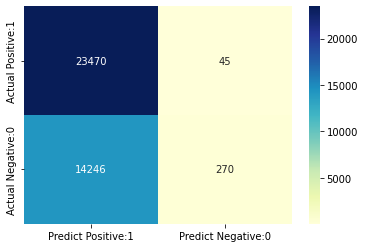

In [ ]:
# import log classifier
from sklearn.linear_model import LogisticRegressionCV

# instantiate classifier with default hyperparameters
lrc=LogisticRegressionCV(Cs=1) 

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(lrc, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
my_cm(y, y_pred)

In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(lrc,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.6242277230505235
precision: 0.6222844019923061
auc: 0.7061338304746732
recall: 0.9980863278758239
f1: 0.766606142522415
TIME: 0.13190117596666748 min


# Stratified Sampling #

FOLD 0 
 AUC 0.7741636617269676
FOLD 1 
 AUC 0.7704325168542239
FOLD 2 
 AUC 0.7793483743894755
FOLD 3 
 AUC 0.777951409120277
FOLD 4 
 AUC 0.7709576468842421
0.7745707217950372
0.003594433458735493
0.8530493692420829
0.001776585785477937


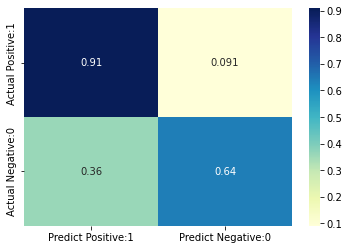

[ 9293  5223  2141 21374]
Female by Percenct


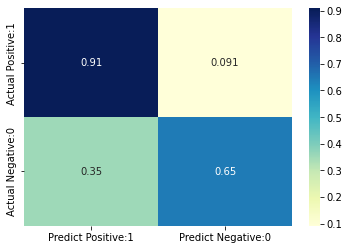

[ 4460  2446  1016 10098]
Male by Percenct


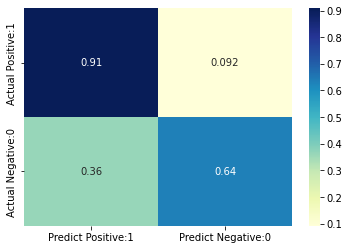

[4395 2526 1001 9915]
Breakdown by South


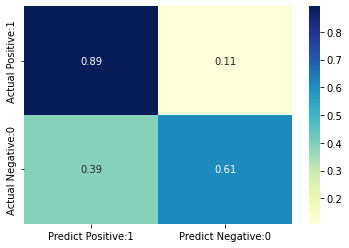

[2470 1586  675 5570]
Breakdown by Midwest


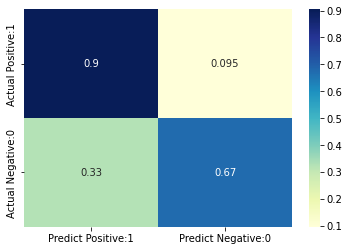

[1969  953  383 3630]
Breakdown by Northeast


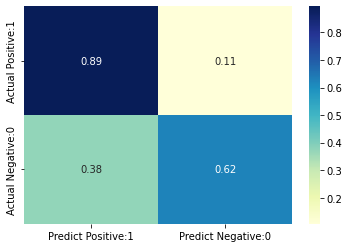

[1168  701  236 2006]
Breakdown by West


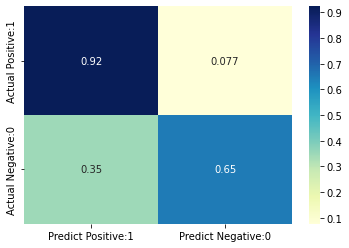

[ 3686  1983   847 10168]
Breakdown by amiakn
YES - By percent


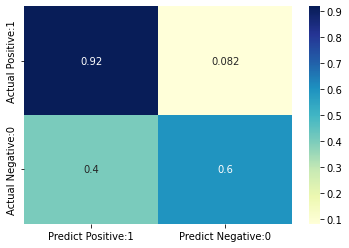

[294 199  58 647]
NO - by percent


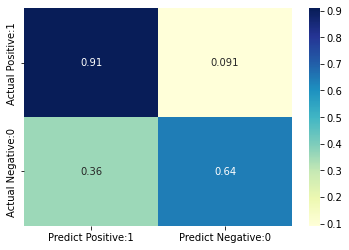

[ 8871  4929  2048 20351]
Breakdown by asian
YES - By percent


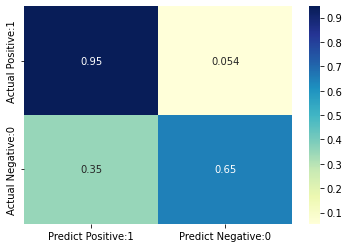

[ 81  44  11 194]
NO - by percent


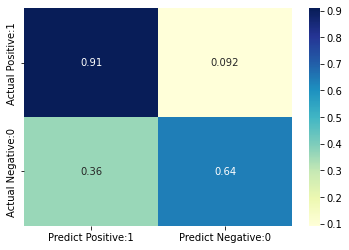

[ 9168  5148  2121 21047]
Breakdown by blkafram
YES - By percent


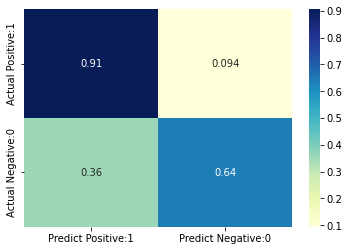

[2978 1663  680 6535]
NO - by percent


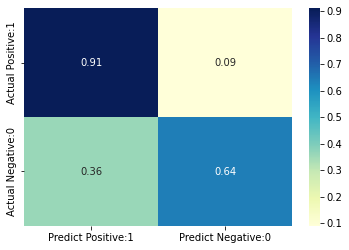

[ 6120  3439  1394 14144]
Breakdown by hawaiipi
YES - By percent


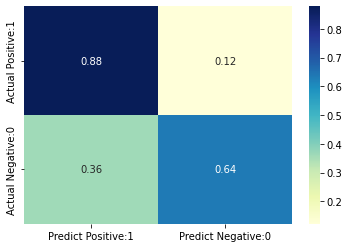

[37 21 10 72]
NO - by percent


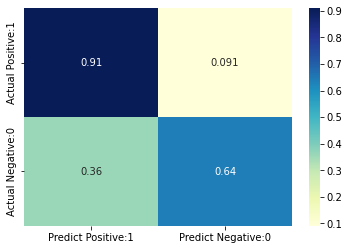

[ 9230  5190  2117 21206]
Breakdown by white
YES - By percent


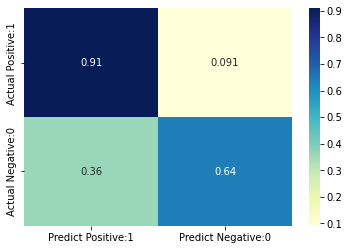

[ 5976  3373  1399 13994]
NO - by percent


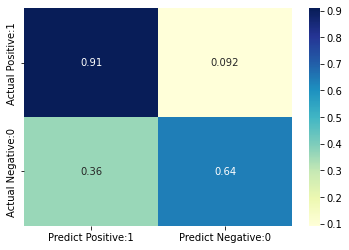

[3074 1728  681 6724]
Breakdown by raceunkn
YES - By percent


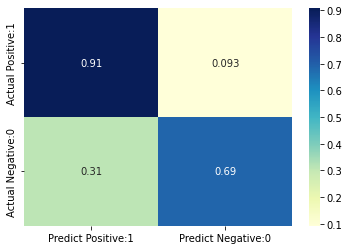

[247 111  42 410]
NO - by percent


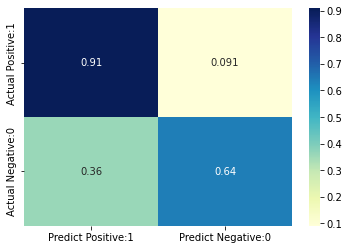

[ 8982  5071  2082 20739]
Breakdown by hisorgin
YES - By percent


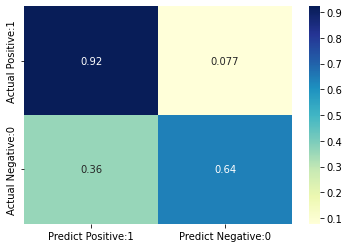

[1470  826  290 3465]
NO - by percent


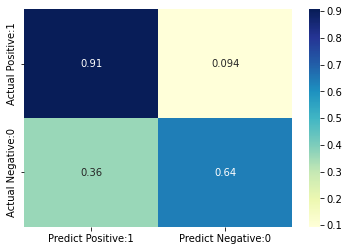

[ 7181  4075  1688 16255]


In [ ]:
from xgboost import XGBClassifier

# instantiate classifier with default hyperparameters
model=XGBClassifier(class_weight="balanced")
#cm=[0,0,0,0]
auc=[]
f1=[]
y_truth=[]
y_pred=[]
splits = kfold.split(X, y)
for n,(train_index, test_index) in enumerate(splits):
  model.fit(X.iloc[train_index, :-1], y.iloc[train_index])
  pred = model.predict(X.iloc[test_index, :-1])
  f=f1_score(y.iloc[test_index], pred)
  f1.append(f)
  a=roc_auc_score(y.iloc[test_index], pred)
  auc.append(a)
  print("FOLD {} \n AUC {}".format(n,a))
  # yi = my_cm_dec(y.iloc[test_index,], pred)
  # print(yi)
  # cm= [cm[i]+ yi[i] for i in range(len(cm))]
  for i in y[test_index]: y_truth.append(i)
  for i in pred: y_pred.append(i)
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(my_cm_dec(y_truth,y_pred))

print("Female by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_female'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_female'] == True].values]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_male'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_male'] == True].values]))
plt.show()

for i in ['South', 'Midwest', "Northeast", 'West']:
  print("Breakdown by {}".format(i))
  print(my_cm_dec(pd.Series(y_truth)[region.index[region == i]], pd.Series(y_pred)[region.index[region == i]]))
  plt.show()


for i in ['amiakn','asian', 'blkafram', 'hawaiipi', 'white','raceunkn', 'hisorgin']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_yes'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_yes'] == True].values]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_no'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_no'] == True].values]))
  plt.show()

FOLD 0 
 AUC 0.8468341818041236
FOLD 1 
 AUC 0.8427118184983031
FOLD 2 
 AUC 0.8435093100621271
FOLD 3 
 AUC 0.8476940166671927
FOLD 4 
 AUC 0.8475237586638764
0.8456546171391246
0.0021121846305939356
0.8478775964437414
0.0019264475823539298


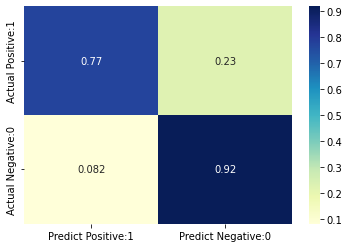

[13329  1187  5336 18179]
Female by Percenct


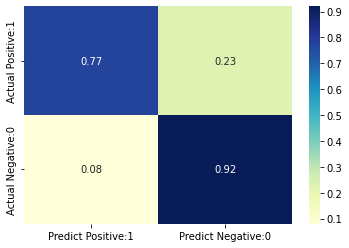

[6353  553 2525 8589]
Male by Percenct


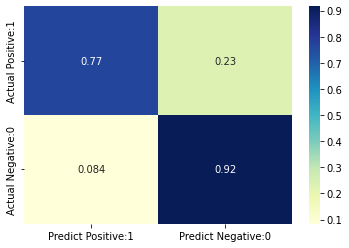

[6342  579 2517 8399]
Breakdown by South


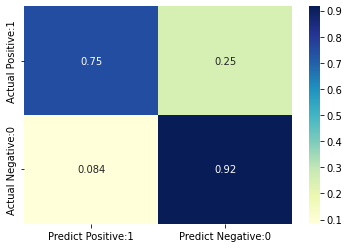

[3715  341 1571 4674]
Breakdown by Midwest


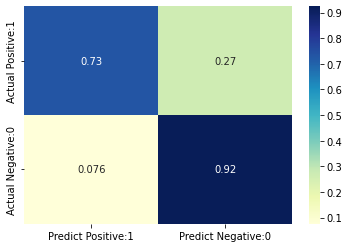

[2701  221 1064 2949]
Breakdown by Northeast


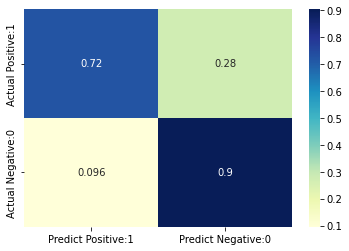

[1690  179  618 1624]
Breakdown by West


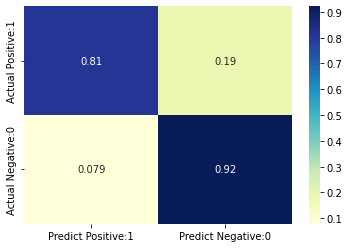

[5223  446 2083 8932]
Breakdown by amiakn
YES - By percent


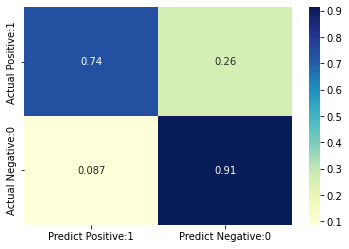

[450  43 183 522]
NO - by percent


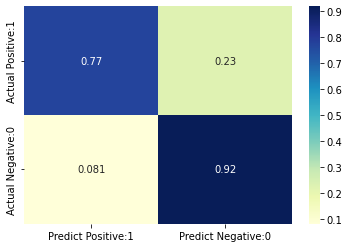

[12676  1124  5072 17327]
Breakdown by asian
YES - By percent


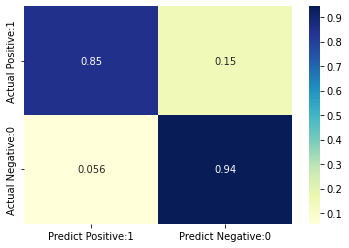

[118   7  31 174]
NO - by percent


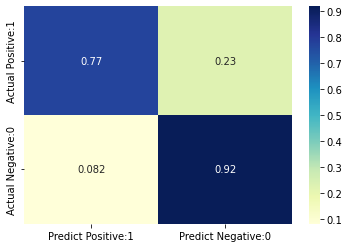

[13142  1174  5276 17892]
Breakdown by blkafram
YES - By percent


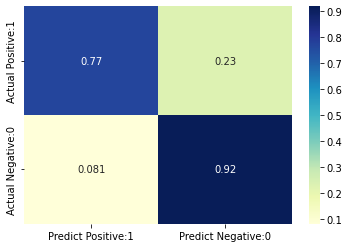

[4267  374 1667 5548]
NO - by percent


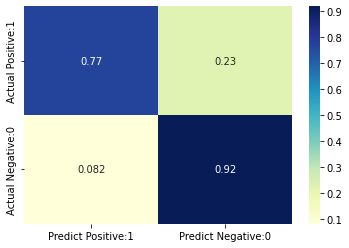

[ 8772   787  3505 12033]
Breakdown by hawaiipi
YES - By percent


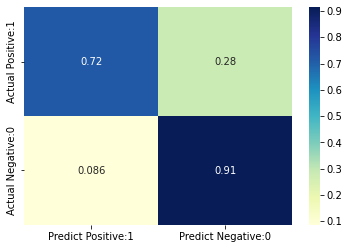

[53  5 23 59]
NO - by percent


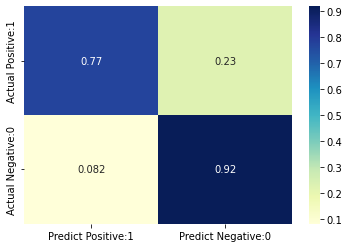

[13241  1179  5291 18032]
Breakdown by white
YES - By percent


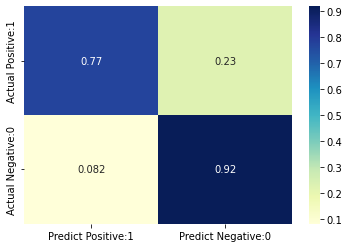

[ 8579   770  3503 11890]
NO - by percent


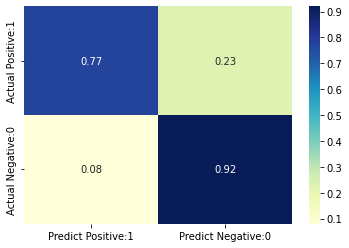

[4418  384 1683 5722]
Breakdown by raceunkn
YES - By percent


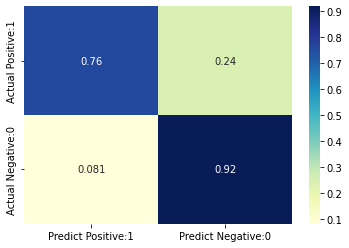

[329  29 109 343]
NO - by percent


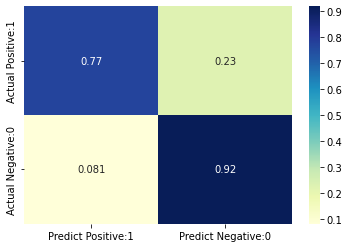

[12913  1140  5182 17639]
Breakdown by hisorgin
YES - By percent


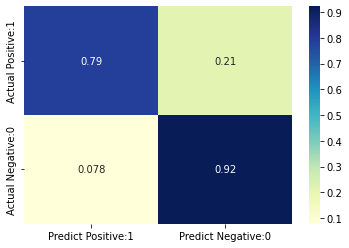

[2116  180  800 2955]
NO - by percent


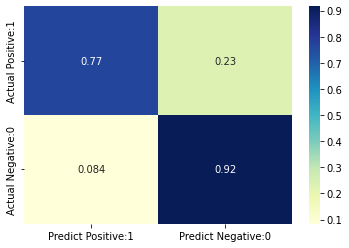

[10310   946  4149 13794]


In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC

model=LinearSVC(class_weight="balanced", max_iter=1800) 
auc=[]
f1=[]
y_truth=[]
y_pred=[]
splits = kfold.split(X, y)
for n,(train_index, test_index) in enumerate(splits):
  model.fit(X.iloc[train_index, :-1], y.iloc[train_index])
  pred = model.predict(X.iloc[test_index, :-1])
  f=f1_score(y.iloc[test_index], pred)
  f1.append(f)
  a=roc_auc_score(y.iloc[test_index], pred)
  auc.append(a)
  print("FOLD {} \n AUC {}".format(n,a))
  # yi = my_cm_dec(y.iloc[test_index,], pred)
  # print(yi)
  # cm= [cm[i]+ yi[i] for i in range(len(cm))]
  for i in y[test_index]: y_truth.append(i)
  for i in pred: y_pred.append(i)
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(my_cm_dec(y_truth,y_pred))

print("Female by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_female'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_female'] == True].values]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_male'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_male'] == True].values]))
plt.show()

for i in ['South', 'Midwest', "Northeast", 'West']:
  print("Breakdown by {}".format(i))
  print(my_cm_dec(pd.Series(y_truth)[region.index[region == i]], pd.Series(y_pred)[region.index[region == i]]))
  plt.show()


for i in ['amiakn','asian', 'blkafram', 'hawaiipi', 'white','raceunkn', 'hisorgin']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_yes'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_yes'] == True].values]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_no'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_no'] == True].values]))
  plt.show()

FOLD 0 
 AUC 0.676618186387096
FOLD 1 
 AUC 0.6648150208502881
FOLD 2 
 AUC 0.6859871107843083
FOLD 3 
 AUC 0.6827805545364327
FOLD 4 
 AUC 0.6759548163312035
0.6772311377778657
0.0072612361902330575
0.7296907515927458
0.004989200142296436


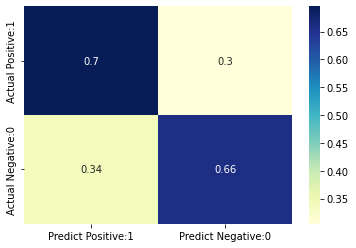

[ 9569  4947  7166 16349]
Female by Percenct


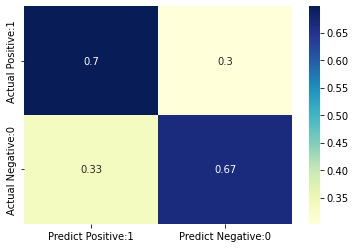

[4600 2306 3362 7752]
Male by Percenct


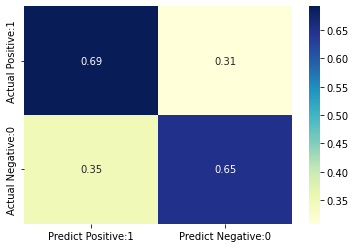

[4498 2423 3366 7550]
Breakdown by South


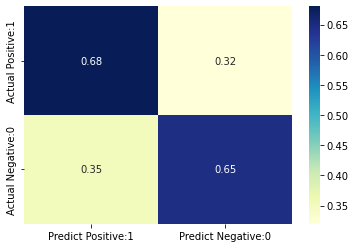

[2625 1431 1998 4247]
Breakdown by Midwest


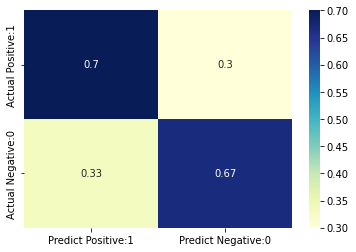

[1957  965 1203 2810]
Breakdown by Northeast


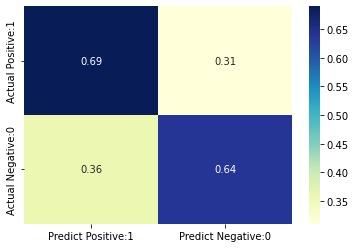

[1197  672  695 1547]
Breakdown by West


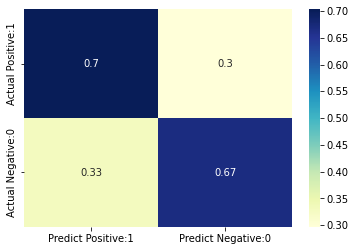

[3790 1879 3270 7745]
Breakdown by amiakn
YES - By percent


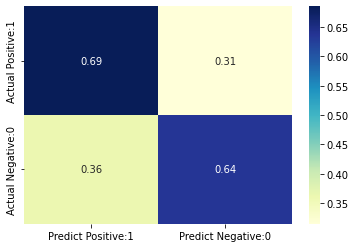

[314 179 222 483]
NO - by percent


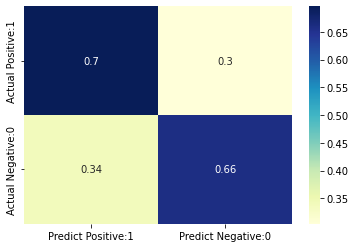

[ 9117  4683  6809 15590]
Breakdown by asian
YES - By percent


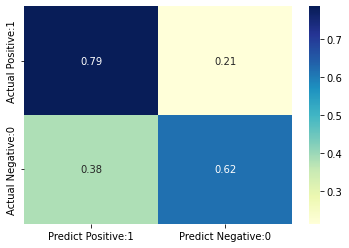

[ 77  48  44 161]
NO - by percent


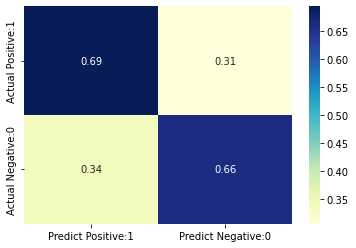

[ 9448  4868  7084 16084]
Breakdown by blkafram
YES - By percent


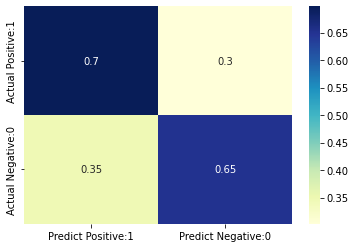

[3028 1613 2182 5033]
NO - by percent


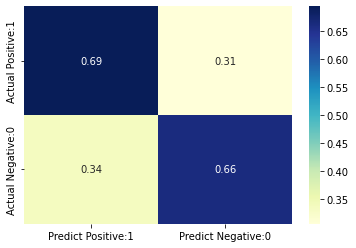

[ 6346  3213  4743 10795]
Breakdown by hawaiipi
YES - By percent


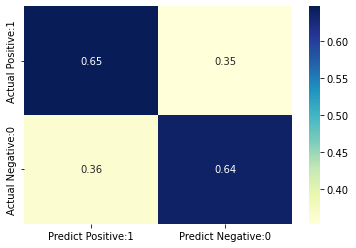

[37 21 29 53]
NO - by percent


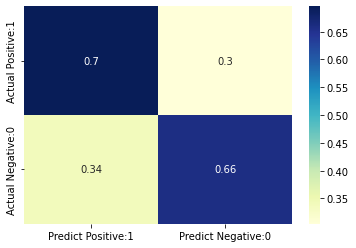

[ 9510  4910  7102 16221]
Breakdown by white
YES - By percent


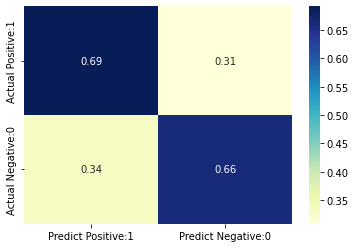

[ 6213  3136  4747 10646]
NO - by percent


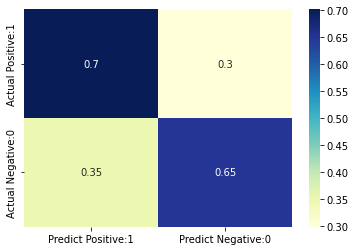

[3118 1684 2207 5198]
Breakdown by raceunkn
YES - By percent


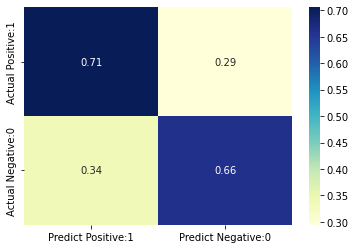

[237 121 133 319]
NO - by percent


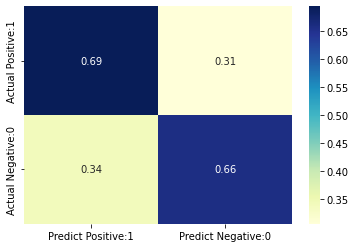

[ 9268  4785  6966 15855]
Breakdown by hisorgin
YES - By percent


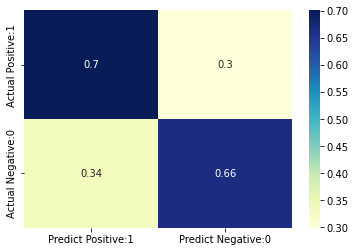

[1526  770 1124 2631]
NO - by percent


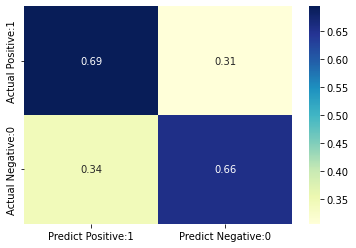

[ 7394  3862  5473 12470]


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

model=LogisticRegressionCV(Cs=1, class_weight="balanced") 
auc=[]
f1=[]
y_truth=[]
y_pred=[]
splits = kfold.split(X, y)
for n,(train_index, test_index) in enumerate(splits):
  model.fit(X.iloc[train_index, :-1], y.iloc[train_index])
  pred = model.predict(X.iloc[test_index, :-1])
  f=f1_score(y.iloc[test_index], pred)
  f1.append(f)
  a=roc_auc_score(y.iloc[test_index], pred)
  auc.append(a)
  print("FOLD {} \n AUC {}".format(n,a))
  # yi = my_cm_dec(y.iloc[test_index,], pred)
  # print(yi)
  # cm= [cm[i]+ yi[i] for i in range(len(cm))]
  for i in y[test_index]: y_truth.append(i)
  for i in pred: y_pred.append(i)
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(my_cm_dec(y_truth,y_pred))

print("Female by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_female'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_female'] == True].values]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_male'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_male'] == True].values]))
plt.show()

for i in ['South', 'Midwest', "Northeast", 'West']:
  print("Breakdown by {}".format(i))
  print(my_cm_dec(pd.Series(y_truth)[region.index[region == i]], pd.Series(y_pred)[region.index[region == i]]))
  plt.show()


for i in ['amiakn','asian', 'blkafram', 'hawaiipi', 'white','raceunkn', 'hisorgin']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_yes'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_yes'] == True].values]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_no'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_no'] == True].values]))
  plt.show()

FOLD 0 
 AUC 0.9232651232523171
FOLD 1 
 AUC 0.9200172653114826
FOLD 2 
 AUC 0.919800423487943
FOLD 3 
 AUC 0.9205255489914199
FOLD 4 
 AUC 0.9204638400786241
0.9208144402243572
0.0012550652328569693
0.9450509148108039
0.000753800851945695


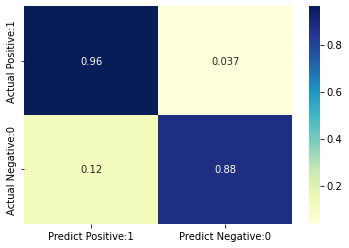

[12756  1760   873 22642]
Female by Percenct


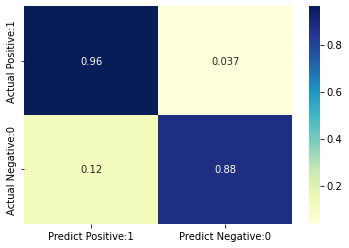

[ 6074   832   411 10703]
Male by Percenct


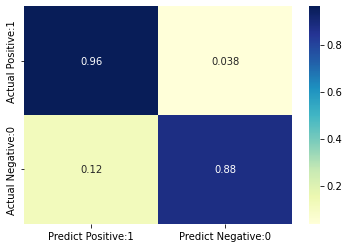

[ 6074   847   410 10506]
Breakdown by South


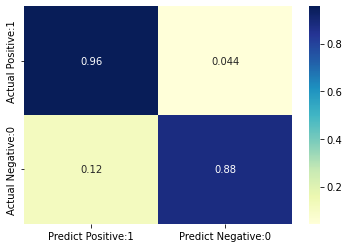

[3560  496  275 5970]
Breakdown by Midwest


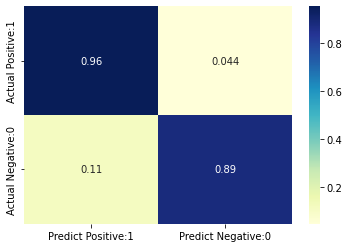

[2588  334  178 3835]
Breakdown by Northeast


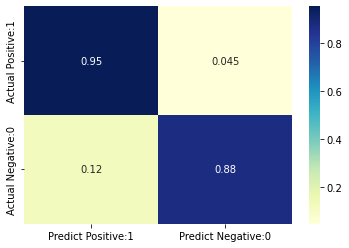

[1636  233  102 2140]
Breakdown by West


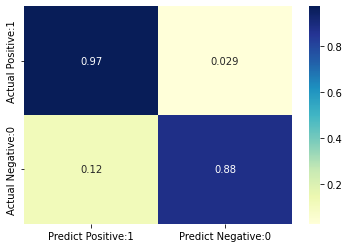

[ 4972   697   318 10697]
Breakdown by amiakn
YES - By percent


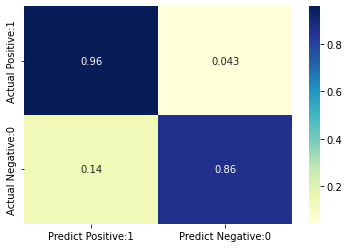

[423  70  30 675]
NO - by percent


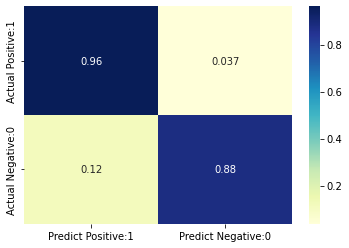

[12145  1655   834 21565]
Breakdown by asian
YES - By percent


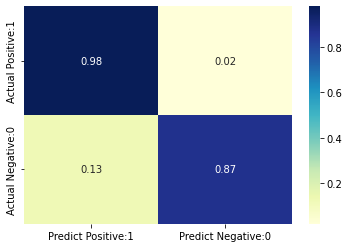

[109  16   4 201]
NO - by percent


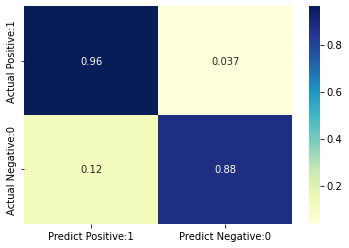

[12581  1735   866 22302]
Breakdown by blkafram
YES - By percent


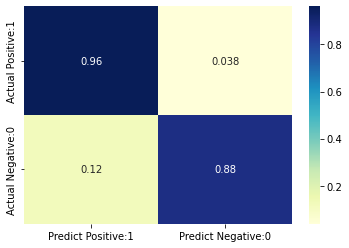

[4068  573  274 6941]
NO - by percent


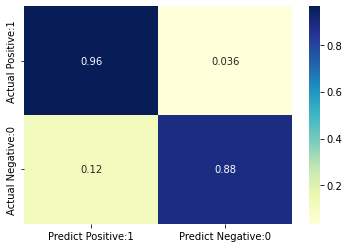

[ 8422  1137   565 14973]
Breakdown by hawaiipi
YES - By percent


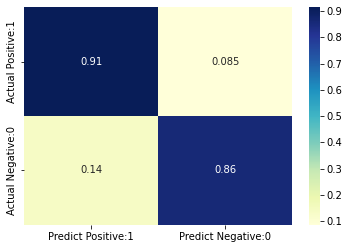

[50  8  7 75]
NO - by percent


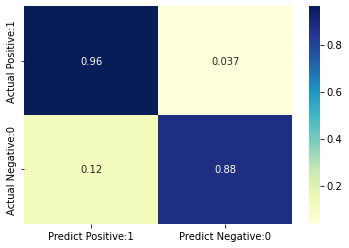

[12674  1746   860 22463]
Breakdown by white
YES - By percent


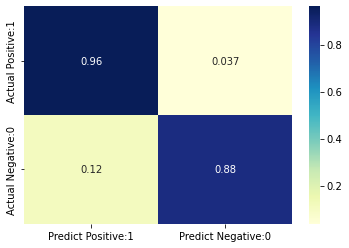

[ 8257  1092   577 14816]
NO - by percent


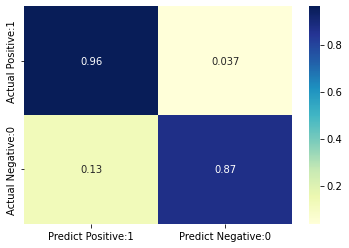

[4187  615  273 7132]
Breakdown by raceunkn
YES - By percent


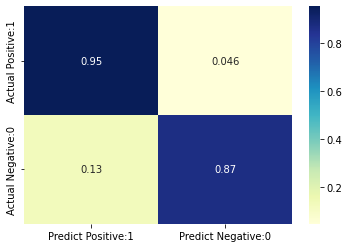

[311  47  21 431]
NO - by percent


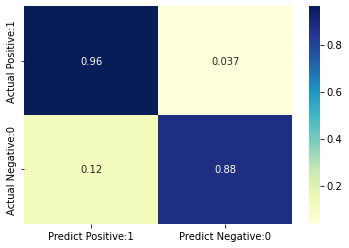

[12360  1693   847 21974]
Breakdown by hisorgin
YES - By percent


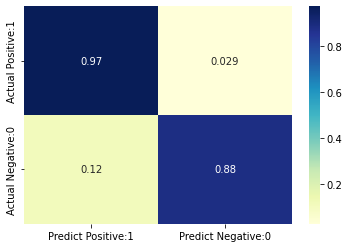

[2031  265  110 3645]
NO - by percent


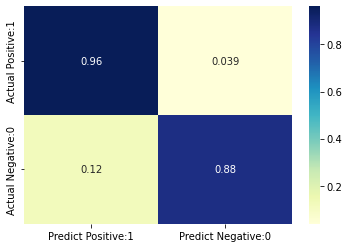

[ 9858  1398   695 17248]


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators = 100) 
auc=[]
f1=[]
y_truth=[]
y_pred=[]
splits = kfold.split(X, y)
for n,(train_index, test_index) in enumerate(splits):
  model.fit(X.iloc[train_index, :-1], y.iloc[train_index])
  pred = model.predict(X.iloc[test_index, :-1])
  f=f1_score(y.iloc[test_index], pred)
  f1.append(f)
  a=roc_auc_score(y.iloc[test_index], pred)
  auc.append(a)
  print("FOLD {} \n AUC {}".format(n,a))
  # yi = my_cm_dec(y.iloc[test_index,], pred)
  # print(yi)
  # cm= [cm[i]+ yi[i] for i in range(len(cm))]
  for i in y[test_index]: y_truth.append(i)
  for i in pred: y_pred.append(i)
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(my_cm_dec(y_truth,y_pred))

print("Female by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_female'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_female'] == True].values]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_male'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_male'] == True].values]))
plt.show()

for i in ['South', 'Midwest', "Northeast", 'West']:
  print("Breakdown by {}".format(i))
  print(my_cm_dec(pd.Series(y_truth)[region.index[region == i]], pd.Series(y_pred)[region.index[region == i]]))
  plt.show()


for i in ['amiakn','asian', 'blkafram', 'hawaiipi', 'white','raceunkn', 'hisorgin']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_yes'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_yes'] == True].values]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_no'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_no'] == True].values]))
  plt.show()

#Over Sampling - Archive

In [ ]:
# OVER SAMPLING
over = pd.DataFrame()
for i in range(2):
  over=over.append(data[data["subabuse_yes"] == 1])
over=over.append(data[data["subabuse_yes"] == 1].iloc[:int(5980 /2),:])
data=data.append(over).sample(frac=1)


In [ ]:
k=5
y = data.loc[:,target]
X = data.loc[:,data.columns != target]
X=X.reset_index(drop=True)

In [ ]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)
#data['target'] IS THE VARIABLE USED FOR STRATIFIED SAMPLING.
splits = kfold.split(data.iloc[:,:-1],data[target])
print(f'PROPORTION OF TARGET IN THE ORIGINAL DATA\n{data[target].value_counts() / len(data)}\n\n')
for n,(train_index,test_index) in enumerate(splits):
    print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
          f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nPROPORTION OF TARGET IN THE TRAINING SET\n'+
          f'{data.iloc[test_index,-1].value_counts() / len(data.iloc[test_index,-1])}\nPROPORTION OF TARGET IN THE TEST SET\n'+
          f'{data.iloc[train_index,-1].value_counts() / len(data.iloc[train_index,-1])}\n\n')

PROPORTION OF TARGET IN THE ORIGINAL DATA
1    0.505136
0    0.494864
Name: subabuse_yes, dtype: float64


SPLIT NO 1
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.50515
0    0.49485
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.505132
0    0.494868
Name: subabuse_yes, dtype: float64


SPLIT NO 2
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.50515
0    0.49485
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.505132
0    0.494868
Name: subabuse_yes, dtype: float64


SPLIT NO 3
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.50515
0    0.49485
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.505132
0    0.494868
Name: subabuse_yes, dtype: float64


SPLIT NO 4
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.50515
0    0.49485
Na

# SVC - Archive

TIME: 1.8907776784833326 min


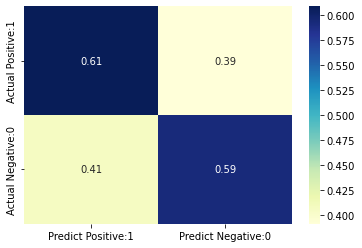

[20501 14090 13831 21478]


In [ ]:
# import SVC classifier
from sklearn.svm import LinearSVC

# instantiate classifier with default hyperparameters
svc=LinearSVC(class_weight="balanced", max_iter=1800) 

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(svc, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
print(my_cm_dec(y, y_pred))
plt.show()


In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(svc,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.6005579399141631
precision: 0.6038616944168578
auc: 0.641360750624823
recall: 0.6082868385948222
f1: 0.6060529529401755
TIME: 1.6714472384333343 min


## Random Forest Classifier

TIME: 0.8961755455833346 min


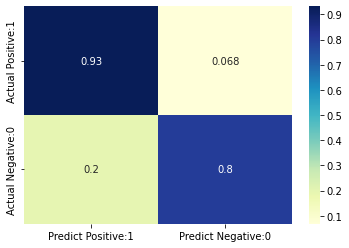

[27709  6882  2412 32897]


In [ ]:
# import RF classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate classifier with default hyperparameters
rfc=RandomForestClassifier(class_weight="balanced") 

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(rfc, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
# my_cm(y, y_pred)
# plt.show()
print(my_cm_dec(y, y_pred))


In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(rfc,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.8664377682403434
precision: 0.8250913150961934
auc: 0.9460230537296782
recall: 0.9334730271156102
f1: 0.8759404581501803
TIME: 0.9529881397166662 min


## XGBoost Classifier

TIME: 1.0898152785666677 min


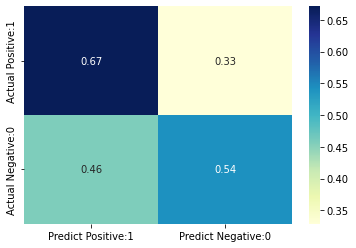

[18734 15857 11613 23696]


In [ ]:
#XGBoost Classifier
from xgboost import XGBClassifier

# instantiate classifier with default hyperparameters
model=XGBClassifier(class_weight="balanced")

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(model, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
print(my_cm_dec(y, y_pred))


In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(model,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.6070100143061516
precision: 0.5990987549946485
auc: 0.6503514094271793
recall: 0.671103633823166
f1: 0.6330537440666903
TIME: 1.1278835855000011 min


## Logistic Regression

TIME: 0.12611695659999972 min
[18902 15689 14306 21003]
(tn, fp, fn, tp)


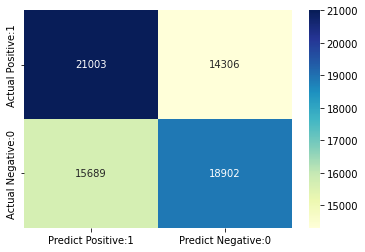

In [ ]:
# import log classifier
from sklearn.linear_model import LogisticRegressionCV

# instantiate classifier with default hyperparameters
lrc=LogisticRegressionCV(Cs=1, class_weight="balanced") 

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(lrc, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
my_cm(y, y_pred)

In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(lrc,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.5708869814020029
precision: 0.5723898673787093
auc: 0.602233540640442
recall: 0.5948338328241363
f1: 0.5833875559340991
TIME: 0.1258075104833324 min


#With Oversampling + Stratified - Archive



0.6075274334112828
0.00393879476712003
0.6343275400501842
0.003626367937674015
[5, 0, 5, 0]
Female by Percenct


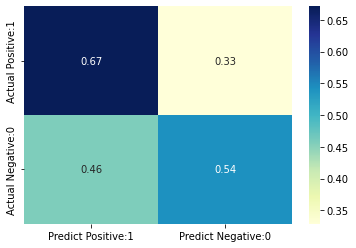

[ 9447  7996  5855 11956]
Male by Percenct


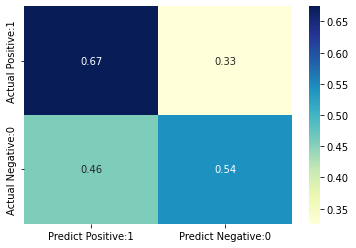

[ 9312  7836  5700 11798]
Breakdown by white
YES - By percent


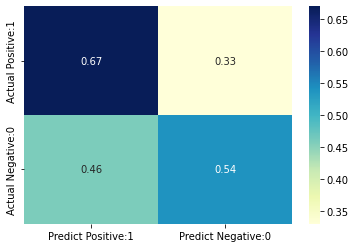

[12539 10682  7825 15846]
NO - by percent


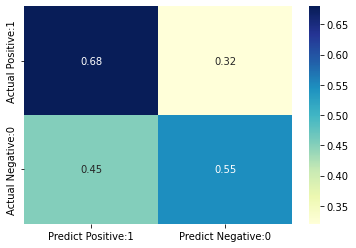

[6217 5149 3728 7904]
Breakdown by blkafram
YES - By percent


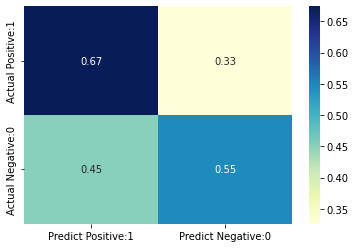

[6028 4978 3696 7644]
NO - by percent


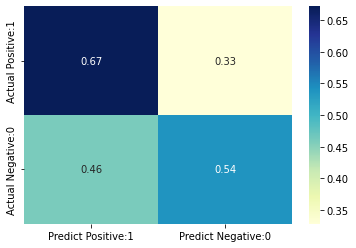

[12728 10853  7857 16104]


In [ ]:
from xgboost import XGBClassifier

# instantiate classifier with default hyperparameters
model=XGBClassifier(class_weight="balanced")
cm=[0,0,0,0]
auc=[]
f1=[]
y=[]
y_pred=[]
splits = kfold.split(data.iloc[:,:-1],data[target])
for n,(train_index, test_index) in enumerate(splits):
  model.fit(data.iloc[train_index, :-1], data.iloc[train_index, -1])
  pred = model.predict(data.iloc[test_index, :-1])
  f=f1_score(data.iloc[test_index, -1], pred)
  f1.append(f)
  a=roc_auc_score(data.iloc[test_index, -1], pred)
  auc.append(a)
  for i in data.iloc[test_index, -1]: y.append(i)
  for i in pred: y_pred.append(i)
  cm= [cm[i]+ y[i] for i in range(len(cm))]
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(cm)


print("Female by Percenct")

print(my_cm_dec(pd.Series(y)[X.index[X['sex_female'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_female'] == True].tolist()]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y)[X.index[X['sex_male'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_male'] == True].tolist()]))
plt.show()

for i in ['white', 'blkafram']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_yes']==True].tolist()],pd.Series(y_pred)[X.index[X[i+'_yes'] == True].tolist()]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_no'] == True].tolist()],pd.Series(y_pred)[X.index[X[i+'_no'] == True].tolist()]))
  plt.show()

0.6004909505525337
0.003550778762227195
0.6055605845811278
0.003461590776551114
[5, 0, 5, 0]
Female by Percenct


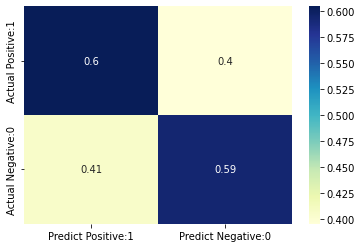

[10360  7083  7040 10771]
Male by Percenct


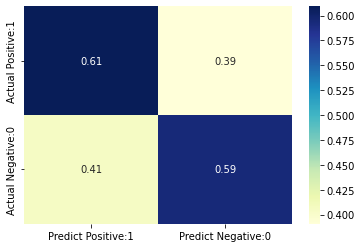

[10186  6962  6836 10662]
Breakdown by white
YES - By percent


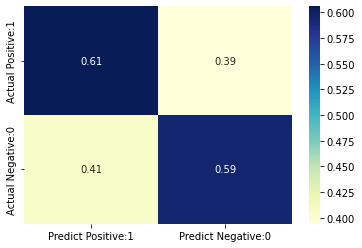

[13809  9412  9328 14343]
NO - by percent


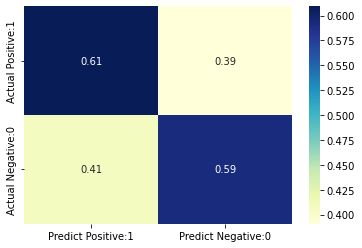

[6733 4633 4545 7087]
Breakdown by blkafram
YES - By percent


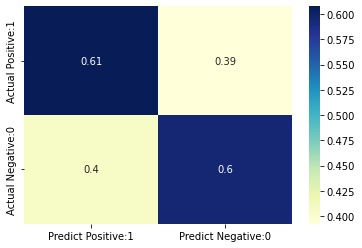

[6553 4453 4449 6891]
NO - by percent


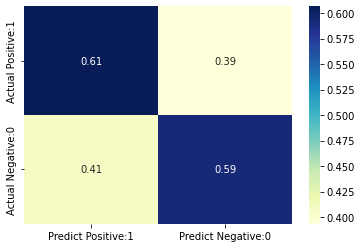

[13989  9592  9424 14537]


In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC

model=LinearSVC(class_weight="balanced", max_iter=1800) 
cm=[0,0,0,0]
auc=[]
f1=[]
y=[]
y_pred=[]
splits = kfold.split(data.iloc[:,:-1],data[target])
for n,(train_index, test_index) in enumerate(splits):
  model.fit(data.iloc[train_index, :-1], data.iloc[train_index, -1])
  pred = model.predict(data.iloc[test_index, :-1])
  f=f1_score(data.iloc[test_index, -1], pred)
  f1.append(f)
  a=roc_auc_score(data.iloc[test_index, -1], pred)
  auc.append(a)
  for i in data.iloc[test_index, -1]: y.append(i)
  for i in pred: y_pred.append(i)
  cm= [cm[i]+ y[i] for i in range(len(cm))]
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(cm)


print("Female by Percenct")

print(my_cm_dec(pd.Series(y)[X.index[X['sex_female'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_female'] == True].tolist()]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y)[X.index[X['sex_male'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_male'] == True].tolist()]))
plt.show()

for i in ['white', 'blkafram']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_yes']==True].tolist()],pd.Series(y_pred)[X.index[X[i+'_yes'] == True].tolist()]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_no'] == True].tolist()],pd.Series(y_pred)[X.index[X[i+'_no'] == True].tolist()]))
  plt.show()

0.5705249494703656
0.004985809693507932
0.583263123317453
0.0039547114225776695
[5, 0, 5, 0]
Female by Percenct


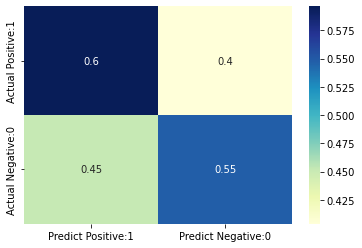

[ 9550  7893  7190 10621]
Male by Percenct


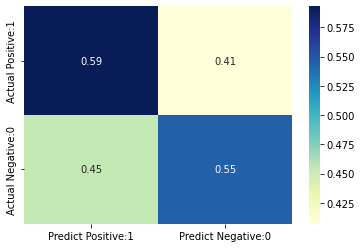

[ 9351  7797  7123 10375]
Breakdown by white
YES - By percent


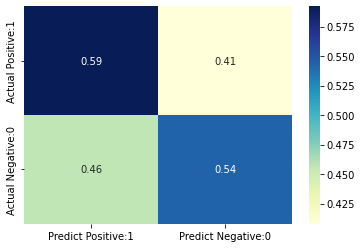

[12618 10603  9653 14018]
NO - by percent


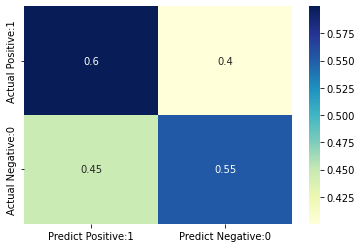

[6281 5085 4656 6976]
Breakdown by blkafram
YES - By percent


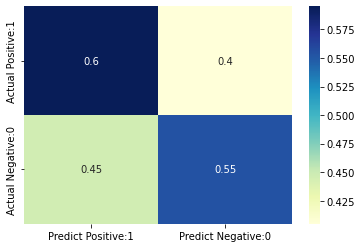

[6097 4909 4591 6749]
NO - by percent


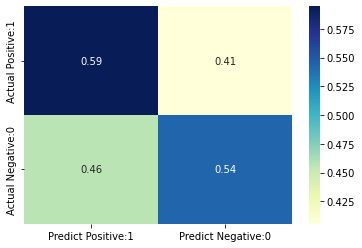

[12802 10779  9718 14243]


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

model=LogisticRegressionCV(Cs=1, class_weight="balanced") 
cm=[0,0,0,0]
auc=[]
f1=[]
y=[]
y_pred=[]
splits = kfold.split(data.iloc[:,:-1],data[target])
for n,(train_index, test_index) in enumerate(splits):
  model.fit(data.iloc[train_index, :-1], data.iloc[train_index, -1])
  pred = model.predict(data.iloc[test_index, :-1])
  f=f1_score(data.iloc[test_index, -1], pred)
  f1.append(f)
  a=roc_auc_score(data.iloc[test_index, -1], pred)
  auc.append(a)
  for i in data.iloc[test_index, -1]: y.append(i)
  for i in pred: y_pred.append(i)
  cm= [cm[i]+ y[i] for i in range(len(cm))]
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(cm)


print("Female by Percenct")

print(my_cm_dec(pd.Series(y)[X.index[X['sex_female'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_female'] == True].tolist()]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y)[X.index[X['sex_male'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_male'] == True].tolist()]))
plt.show()

for i in ['white', 'blkafram']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_yes']==True].tolist()],pd.Series(y_pred)[X.index[X[i+'_yes'] == True].tolist()]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_no'] == True].tolist()],pd.Series(y_pred)[X.index[X[i+'_no'] == True].tolist()]))
  plt.show()

0.5705249494703656
0.004985809693507932
0.583263123317453
0.0039547114225776695
Female by Percenct


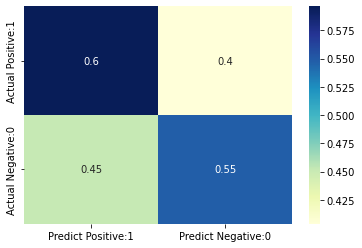

[ 9550  7893  7190 10621]
Male by Percenct


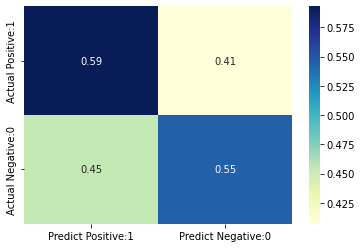

[ 9351  7797  7123 10375]
Breakdown by white
YES - By percent


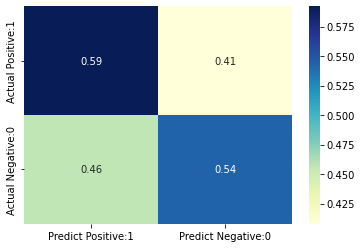

[12618 10603  9653 14018]
NO - by percent


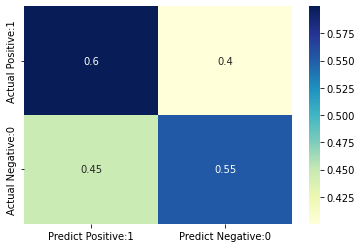

[6281 5085 4656 6976]
Breakdown by blkafram
YES - By percent


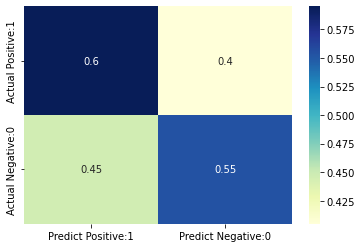

[6097 4909 4591 6749]
NO - by percent


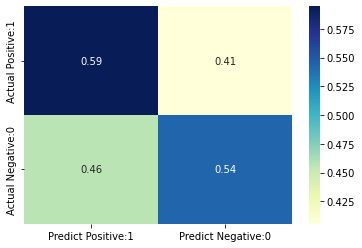

[12802 10779  9718 14243]


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators = 10, criterion="entropy", class_weight="balanced") 
cm=[0,0,0,0]
auc=[]
f1=[]
y=[]
y_pred=[]
splits = kfold.split(data.iloc[:,:-1],data[target])
for n,(train_index, test_index) in enumerate(splits):
  model.fit(data.iloc[train_index, :-1], data.iloc[train_index, -1])
  pred = model.predict(data.iloc[test_index, :-1])
  f=f1_score(data.iloc[test_index, -1], pred)
  f1.append(f)
  a=roc_auc_score(data.iloc[test_index, -1], pred)
  auc.append(a)
  for i in data.iloc[test_index, -1]: y.append(i)
  for i in pred: y_pred.append(i)
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))


print("Female by Percenct")

print(my_cm_dec(pd.Series(y)[X.index[X['sex_female'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_female'] == True].tolist()]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y)[X.index[X['sex_male'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_male'] == True].tolist()]))
plt.show()

for i in ['white', 'blkafram']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_yes']==True].tolist()],pd.Series(y_pred)[X.index[X[i+'_yes'] == True].tolist()]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_no'] == True].tolist()],pd.Series(y_pred)[X.index[X[i+'_no'] == True].tolist()]))
  plt.show()

In [ ]:
print("Breakdown by Sex")
print("Female by Number")
my_cm(y.iloc[X.index[X['sex_female'] == True].tolist()].values,y_pred[X.index[X['sex_female'] == True].tolist()])
plt.show()
print("Male by Number")
my_cm(y.iloc[X.index[X['sex_male'] == True].tolist()].values,y_pred[X.index[X['sex_male'] == True].tolist()])
plt.show()
print("Female by Percenct")
my_cm_dec(y.iloc[X.index[X['sex_female'] == True].tolist()].values,y_pred[X.index[X['sex_female'] == True].tolist()])
plt.show()
print("Male by Percenct")
my_cm_dec(y.iloc[X.index[X['sex_male'] == True].tolist()].values,y_pred[X.index[X['sex_male'] == True].tolist()])
plt.show()

for i in ['amiakn','asian', 'blkafram', 'hawaiipi', 'white','raceunkn', 'hisorgin']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  my_cm_dec(y.iloc[X.index[X[i+'_yes']==True].tolist()].values,y_pred[X.index[X[i+'_yes'] == True].tolist()])
  plt.show()

  print("NO - by percent")
  my_cm_dec(y.iloc[X.index[X[i+'_no'] == True].tolist()].values,y_pred[X.index[X[i+'_no'] == True].tolist()])
  plt.show()

  print("YES - By numbers")
  my_cm(y.iloc[X.index[X[i+'_yes']==True].tolist()].values,y_pred[X.index[X[i+'_yes'] == True].tolist()])
  plt.show()

  print("NO - By numbers")
  my_cm(y.iloc[X.index[X[i+'_no'] == True].tolist()].values,y_pred[X.index[X[i+'_no'] == True].tolist()])
  plt.show()

Breakdown by Sex
Female by Number


AttributeError: ignored